In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
pd.set_option('html', False)

Introduction to Pandas
===

Data Structures
---

###Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [4]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [5]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450
Boston            NaN
Chicago          1000
New York         1300
Portland          900
San Francisco    1100
dtype: float64

You can use the index (or list of indices) to select specific items from the Series

In [6]:
cities['Chicago']


1000.0

In [7]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000
Portland          900
San Francisco    1100
dtype: float64

Or you can use boolean indexing for selection.

In [8]:
cities[cities < 1000]


Austin      450
Portland    900
dtype: float64

Mathematical operations can be done using scalars and functions.

In [9]:
cities ** 2

Austin            202500
Boston               NaN
Chicago          1000000
New York         1690000
Portland          810000
San Francisco    1210000
dtype: float64

In [10]:
np.log(cities)

Austin           6.109248
Boston                NaN
Chicago          6.907755
New York         7.170120
Portland         6.802395
San Francisco    7.003065
dtype: float64

###DataFrame

A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

In [11]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Liverpool', 'Liverpool', 'Liverpool', 'Chelsea', 'Chelsea', 'Everton', 'Everton', 'Everton'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
print football

   year       team  wins  losses
0  2010  Liverpool    11       5
1  2011  Liverpool     8       8
2  2012  Liverpool    10       6
3  2011    Chelsea    15       1
4  2012    Chelsea    11       5
5  2010    Everton     6      10
6  2011    Everton    10       6
7  2012    Everton     4      12


A new column can be added to the dataframe with the use of a series object, the length of the series doesn't have to match that of the dataframe

In [12]:
month = pd.Series(['Jan', 'Feb', 'Mar', 'Apr']*2)
football['month'] = month
football

   year       team  wins  losses month
0  2010  Liverpool    11       5   Jan
1  2011  Liverpool     8       8   Feb
2  2012  Liverpool    10       6   Mar
3  2011    Chelsea    15       1   Apr
4  2012    Chelsea    11       5   Jan
5  2010    Everton     6      10   Feb
6  2011    Everton    10       6   Mar
7  2012    Everton     4      12   Apr

However, when using other forms of data structures, such as arrays or lists, the length has to match the number of columns.

In [13]:
time_of_day = ['AM', 'PM']
football['time'] = time_of_day

ValueError: Length of values does not match length of index

The different columns of the dataframe can be accessed using the column names either like a dictionary or as a varible within the dataframe

In [ ]:
football['team']

The individual rows can be gotten by accessing the index variable 'ix' with the index of the row

In [14]:
football.ix[0]

year           2010
team      Liverpool
wins             11
losses            5
month           Jan
Name: 0, dtype: object

Reading from File
---

In [2]:
temp = '%s.csv'
path = temp % 'AAPL'
!wc -l $path

    3949 AAPL.csv


In [3]:
aapl_bars = pd.read_csv(temp % 'AAPL')
aapl_bars.head()

                    dt  open_price    high     low  close_price   volume
0  2015-02-05 14:30:00      120.02  120.10  119.85       120.07   577941
1  2015-02-05 14:35:00      120.08  120.11  119.52       119.84  1920261
2  2015-02-05 14:40:00      119.85  120.04  119.74       119.97  1028291
3  2015-02-05 14:45:00      119.96  120.09  119.85       119.98  1060368
4  2015-02-05 14:50:00      119.99  120.16  119.97       120.08   878099

Time series operations
---

In [4]:
aapl_bars.dt

0       2015-02-05 14:30:00
1       2015-02-05 14:35:00
2       2015-02-05 14:40:00
3       2015-02-05 14:45:00
4       2015-02-05 14:50:00
5       2015-02-05 14:55:00
6       2015-02-05 15:00:00
7       2015-02-05 15:05:00
8       2015-02-05 15:10:00
9       2015-02-05 15:15:00
10      2015-02-05 15:20:00
11      2015-02-05 15:25:00
12      2015-02-05 15:30:00
13      2015-02-05 15:35:00
14      2015-02-05 15:40:00
15      2015-02-05 15:45:00
16      2015-02-05 15:50:00
17      2015-02-05 15:55:00
18      2015-02-05 16:00:00
19      2015-02-05 16:05:00
20      2015-02-05 16:10:00
21      2015-02-05 16:15:00
22      2015-02-05 16:20:00
23      2015-02-05 16:25:00
24      2015-02-05 16:30:00
25      2015-02-05 16:35:00
26      2015-02-05 16:40:00
27      2015-02-05 16:45:00
28      2015-02-05 16:50:00
29      2015-02-05 16:55:00
               ...         
3917    2015-04-17 18:35:00
3918    2015-04-17 18:40:00
3919    2015-04-17 18:45:00
3920    2015-04-17 18:50:00
3921    2015-04-17 1

In [5]:
aapl_bars.index = pd.to_datetime(aapl_bars.pop('dt'))

In [6]:
aapl_bars.head()

                     open_price    high     low  close_price   volume
dt                                                                   
2015-02-05 14:30:00      120.02  120.10  119.85       120.07   577941
2015-02-05 14:35:00      120.08  120.11  119.52       119.84  1920261
2015-02-05 14:40:00      119.85  120.04  119.74       119.97  1028291
2015-02-05 14:45:00      119.96  120.09  119.85       119.98  1060368
2015-02-05 14:50:00      119.99  120.16  119.97       120.08   878099

In [7]:
def load_bars(ticker):
    bars = pd.read_csv(temp % ticker)
    bars.index = pd.to_datetime(bars.pop('dt'))
    return bars

In [8]:
aapl_bars.at_time(time(14, 30)).head(10)

                     open_price    high     low  close_price   volume
dt                                                                   
2015-02-05 14:30:00      120.02  120.10  119.85       120.07   577941
2015-02-06 14:30:00      120.02  120.16  120.02       120.05   578055
2015-02-09 14:30:00      118.55  118.58  118.43       118.58   318712
2015-02-10 14:30:00      120.17  120.31  120.16       120.30   646886
2015-02-11 14:30:00      122.77  122.90  122.58       122.81   624106
2015-02-12 14:30:00      126.06  126.15  125.89       125.90  1333210
2015-02-13 14:30:00      127.28  127.28  127.15       127.25   933002
2015-02-17 14:30:00      127.49  127.49  127.40       127.46   797492
2015-02-18 14:30:00      127.62  127.80  127.45       127.66   465408
2015-02-19 14:30:00      128.48  128.48  128.41       128.41   335266

In [9]:
aapl_bars.close_price['2015-03-19']

dt
2015-03-19 13:30:00    128.78
2015-03-19 13:35:00    129.13
2015-03-19 13:40:00    128.97
2015-03-19 13:45:00    128.73
2015-03-19 13:50:00    128.63
2015-03-19 13:55:00    128.60
2015-03-19 14:00:00    128.53
2015-03-19 14:05:00    128.46
2015-03-19 14:10:00    128.13
2015-03-19 14:15:00    128.45
2015-03-19 14:20:00    128.47
2015-03-19 14:25:00    128.42
2015-03-19 14:30:00    128.27
2015-03-19 14:35:00    128.29
2015-03-19 14:40:00    128.30
2015-03-19 14:45:00    128.33
2015-03-19 14:50:00    128.16
2015-03-19 14:55:00    128.19
2015-03-19 15:00:00    128.36
2015-03-19 15:05:00    128.41
2015-03-19 15:10:00    128.15
2015-03-19 15:15:00    128.11
2015-03-19 15:20:00    128.09
2015-03-19 15:25:00    128.02
2015-03-19 15:30:00    128.06
2015-03-19 15:35:00    127.86
2015-03-19 15:40:00    127.98
2015-03-19 15:45:00    128.04
2015-03-19 15:50:00    128.09
2015-03-19 15:55:00    128.08
                        ...  
2015-03-19 17:35:00    128.15
2015-03-19 17:40:00    127.89
2015-03

Data alignment
---

In [14]:
ts1 = pd.Series(np.random.randn(10), 
                index=pd.date_range('1/1/2000', periods=10))
ts1

2000-01-01   -1.333046
2000-01-02   -0.701696
2000-01-03   -1.985939
2000-01-04    2.496814
2000-01-05   -1.459653
2000-01-06   -0.667527
2000-01-07    0.701424
2000-01-08    0.207097
2000-01-09    1.115106
2000-01-10    0.628178
Freq: D, dtype: float64

In [15]:
ts2 = ts1[[0, 2, 4, 5, 6, 7, 8]]
ts2

2000-01-01   -1.333046
2000-01-03   -1.985939
2000-01-05   -1.459653
2000-01-06   -0.667527
2000-01-07    0.701424
2000-01-08    0.207097
2000-01-09    1.115106
dtype: float64

In [16]:
ts1 + ts2

2000-01-01   -2.666091
2000-01-02         NaN
2000-01-03   -3.971878
2000-01-04         NaN
2000-01-05   -2.919307
2000-01-06   -1.335054
2000-01-07    1.402849
2000-01-08    0.414195
2000-01-09    2.230213
2000-01-10         NaN
dtype: float64

In [17]:
df = pd.DataFrame({'A': ts1, 'B': ts2})
df

                   A         B
2000-01-01 -1.333046 -1.333046
2000-01-02 -0.701696       NaN
2000-01-03 -1.985939 -1.985939
2000-01-04  2.496814       NaN
2000-01-05 -1.459653 -1.459653
2000-01-06 -0.667527 -0.667527
2000-01-07  0.701424  0.701424
2000-01-08  0.207097  0.207097
2000-01-09  1.115106  1.115106
2000-01-10  0.628178       NaN

In [18]:
ibm_bars = load_bars('IBM')

In [19]:
def subsample(frame, pct=0.9):
    N = len(frame)
    indexer = np.sort(np.random.permutation(N)[:pct*N])
    return frame.take(indexer)

f1 = subsample(ibm_bars)
f2 = subsample(aapl_bars)
f1

                     open_price    high     low  close_price  volume
dt                                                                  
2015-02-05 14:30:00      157.29  157.48  157.29       157.48     200
2015-02-05 14:35:00      157.48  157.86  157.30       157.50  104111
2015-02-05 14:40:00      157.50  157.54  157.30       157.50   49119
2015-02-05 14:45:00      157.50  157.50  157.15       157.50   53640
2015-02-05 14:50:00      157.50  157.79  157.32       157.78   60443
2015-02-05 14:55:00      157.77  158.06  157.76       157.93   53523
2015-02-05 15:00:00      157.93  157.94  157.61       157.70   40586
2015-02-05 15:05:00      157.64  157.76  157.58       157.70   43421
2015-02-05 15:10:00      157.70  158.00  157.68       157.73   41793
2015-02-05 15:20:00      157.79  157.80  157.61       157.65   25312
2015-02-05 15:25:00      157.68  157.68  157.52       157.63   40829
2015-02-05 15:30:00      157.67  157.96  157.66       157.95   52566
2015-02-05 15:35:00      157.95  1

In [20]:
both = pd.concat([f1, f2], axis=1, keys=['IBM', 'AAPL'])
both.head(20)

                           IBM                                           AAPL  \
                    open_price    high     low close_price  volume open_price   
dt                                                                              
2015-02-05 14:30:00     157.29  157.48  157.29      157.48     200     120.02   
2015-02-05 14:35:00     157.48  157.86  157.30      157.50  104111     120.08   
2015-02-05 14:40:00     157.50  157.54  157.30      157.50   49119     119.85   
2015-02-05 14:45:00     157.50  157.50  157.15      157.50   53640     119.96   
2015-02-05 14:50:00     157.50  157.79  157.32      157.78   60443        NaN   
2015-02-05 14:55:00     157.77  158.06  157.76      157.93   53523     120.05   
2015-02-05 15:00:00     157.93  157.94  157.61      157.70   40586     119.96   
2015-02-05 15:05:00     157.64  157.76  157.58      157.70   43421     119.78   
2015-02-05 15:10:00     157.70  158.00  157.68      157.73   41793     119.90   
2015-02-05 15:15:00        N

Missing data handling
---

In [21]:
df

                   A         B
2000-01-01 -1.333046 -1.333046
2000-01-02 -0.701696       NaN
2000-01-03 -1.985939 -1.985939
2000-01-04  2.496814       NaN
2000-01-05 -1.459653 -1.459653
2000-01-06 -0.667527 -0.667527
2000-01-07  0.701424  0.701424
2000-01-08  0.207097  0.207097
2000-01-09  1.115106  1.115106
2000-01-10  0.628178       NaN

In [22]:
df.count()

A    10
B     7
dtype: int64

In [23]:
both.count()

IBM   open_price     3519
      high           3519
      low            3519
      close_price    3519
      volume         3519
AAPL  open_price     3552
      high           3552
      low            3552
      close_price    3552
      volume         3552
dtype: int64

In [24]:
df.sum()

A   -0.999241
B   -3.422537
dtype: float64

In [25]:
df.mean(1)

2000-01-01   -1.333046
2000-01-02   -0.701696
2000-01-03   -1.985939
2000-01-04    2.496814
2000-01-05   -1.459653
2000-01-06   -0.667527
2000-01-07    0.701424
2000-01-08    0.207097
2000-01-09    1.115106
2000-01-10    0.628178
Freq: D, dtype: float64

In [26]:
df.dropna()

                   A         B
2000-01-01 -1.333046 -1.333046
2000-01-03 -1.985939 -1.985939
2000-01-05 -1.459653 -1.459653
2000-01-06 -0.667527 -0.667527
2000-01-07  0.701424  0.701424
2000-01-08  0.207097  0.207097
2000-01-09  1.115106  1.115106

In [27]:
df.fillna(0)

                   A         B
2000-01-01 -1.333046 -1.333046
2000-01-02 -0.701696  0.000000
2000-01-03 -1.985939 -1.985939
2000-01-04  2.496814  0.000000
2000-01-05 -1.459653 -1.459653
2000-01-06 -0.667527 -0.667527
2000-01-07  0.701424  0.701424
2000-01-08  0.207097  0.207097
2000-01-09  1.115106  1.115106
2000-01-10  0.628178  0.000000

In [28]:
df.fillna(method='ffill')

                   A         B
2000-01-01 -1.333046 -1.333046
2000-01-02 -0.701696 -1.333046
2000-01-03 -1.985939 -1.985939
2000-01-04  2.496814 -1.985939
2000-01-05 -1.459653 -1.459653
2000-01-06 -0.667527 -0.667527
2000-01-07  0.701424  0.701424
2000-01-08  0.207097  0.207097
2000-01-09  1.115106  1.115106
2000-01-10  0.628178  1.115106

In [29]:
df.asfreq('4h')

                            A         B
2000-01-01 00:00:00 -1.333046 -1.333046
2000-01-01 04:00:00       NaN       NaN
2000-01-01 08:00:00       NaN       NaN
2000-01-01 12:00:00       NaN       NaN
2000-01-01 16:00:00       NaN       NaN
2000-01-01 20:00:00       NaN       NaN
2000-01-02 00:00:00 -0.701696       NaN
2000-01-02 04:00:00       NaN       NaN
2000-01-02 08:00:00       NaN       NaN
2000-01-02 12:00:00       NaN       NaN
2000-01-02 16:00:00       NaN       NaN
2000-01-02 20:00:00       NaN       NaN
2000-01-03 00:00:00 -1.985939 -1.985939
2000-01-03 04:00:00       NaN       NaN
2000-01-03 08:00:00       NaN       NaN
2000-01-03 12:00:00       NaN       NaN
2000-01-03 16:00:00       NaN       NaN
2000-01-03 20:00:00       NaN       NaN
2000-01-04 00:00:00  2.496814       NaN
2000-01-04 04:00:00       NaN       NaN
2000-01-04 08:00:00       NaN       NaN
2000-01-04 12:00:00       NaN       NaN
2000-01-04 16:00:00       NaN       NaN
2000-01-04 20:00:00       NaN       NaN


In [30]:
df.asfreq('4h').ffill(limit=3)

                            A         B
2000-01-01 00:00:00 -1.333046 -1.333046
2000-01-01 04:00:00 -1.333046 -1.333046
2000-01-01 08:00:00 -1.333046 -1.333046
2000-01-01 12:00:00 -1.333046 -1.333046
2000-01-01 16:00:00       NaN       NaN
2000-01-01 20:00:00       NaN       NaN
2000-01-02 00:00:00 -0.701696       NaN
2000-01-02 04:00:00 -0.701696       NaN
2000-01-02 08:00:00 -0.701696       NaN
2000-01-02 12:00:00 -0.701696       NaN
2000-01-02 16:00:00       NaN       NaN
2000-01-02 20:00:00       NaN       NaN
2000-01-03 00:00:00 -1.985939 -1.985939
2000-01-03 04:00:00 -1.985939 -1.985939
2000-01-03 08:00:00 -1.985939 -1.985939
2000-01-03 12:00:00 -1.985939 -1.985939
2000-01-03 16:00:00       NaN       NaN
2000-01-03 20:00:00       NaN       NaN
2000-01-04 00:00:00  2.496814       NaN
2000-01-04 04:00:00  2.496814       NaN
2000-01-04 08:00:00  2.496814       NaN
2000-01-04 12:00:00  2.496814       NaN
2000-01-04 16:00:00       NaN       NaN
2000-01-04 20:00:00       NaN       NaN


Data Analysis & Plots
---

In [79]:
aapl_bars2 = load_bars('AAPL2')
mth_mean = aapl_bars2.close_price.resample('Q', how=['mean', 'median', 'std'])
mth_mean

                  mean      median         std
dt                                            
1980-12-31   30.442332   29.625120    3.843903
1981-03-31   27.627040   26.625200    3.312069
1981-06-30   29.001991   28.375200    2.258885
1981-09-30   21.609129   22.125040    3.273734
1981-12-31   19.140590   18.874800    1.430488
1982-03-31   18.354849   18.500160    1.720529
1982-06-30   14.769849   14.375200    1.495266
1982-09-30   15.162079   14.249760    2.564656
1982-12-31   28.191371   29.125040    3.960263
1983-03-31   40.565493   42.375200    5.713922
1983-06-30   52.220240   53.124960    5.992199
1983-09-30   35.692444   33.999840    6.685009
1983-12-31   21.609120   21.124880    1.718077
1984-03-31   26.293662   26.250000    1.413870
1984-06-30   28.765867   29.000160    2.540779
1984-09-30   26.880916   26.750080    1.318202
1984-12-31   25.291000   24.937640    1.548806
1985-03-31   26.693520   27.937560    3.153834
1985-06-30   19.214293   19.874960    2.354716
1985-09-30   

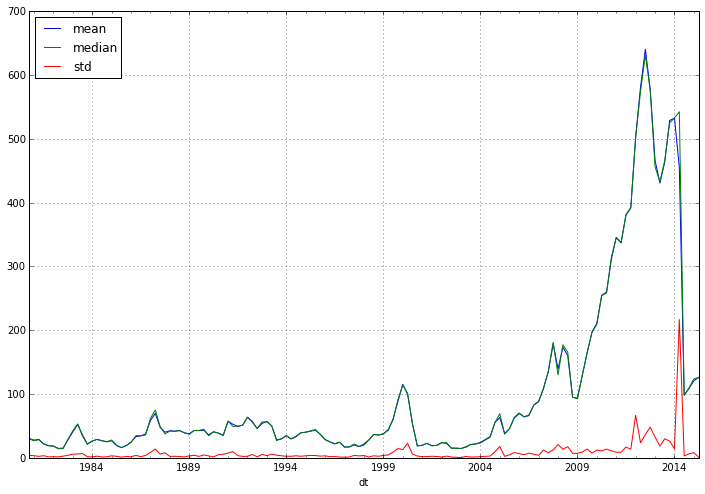

In [81]:
mth_mean.plot()

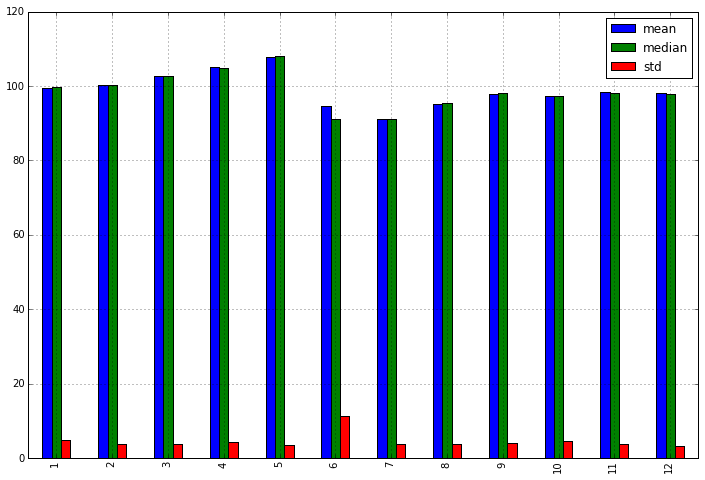

In [78]:
mth_mean.groupby(mth_mean.index.month).aggregate(np.mean).plot(kind='bar')

Regression Analysis
---

In [28]:
import scipy.stats as stats
x = np.array(range(1, 101))
y = 2*x + np.random.normal(20, 1000, size = 100)

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print "y = ", slope, "x + ", intercept
print "R squared ", r_value**2

y =  10.3588024566 x +  -420.928428853
R squared  0.0755609833019


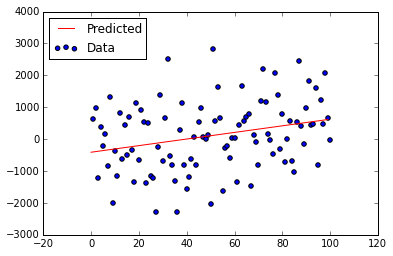

In [30]:
plt.scatter(x, y, label = 'Data')
plt.plot((slope * x) + intercept, 'r-', label='Predicted')
plt.legend(loc='upper left');

In [35]:
y = x**2 + np.random.normal(2, 10, size = 100) ** 2
z = np.polyfit(x, y, 4)
x, y

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  3.40830208e+02,   4.93236443e+00,   2.00297664e+02,
          4.11411759e+02,   1.13719588e+02,   3.69034681e+01,
          1.31318457e+02,   4.03735872e+02,   3.42772109e+02,
          1.07361746e+02,   1.31763166e+02,   1.51614280e+02,
          2.54015736e+02,   3.06637104e+02,   3.08584111e+02,
          3.68787823e+02,   5.85603395e+02,   5.41311758e+02,
          4.34312816e+02,   4.46130750e+02,   4.66996464e+02,


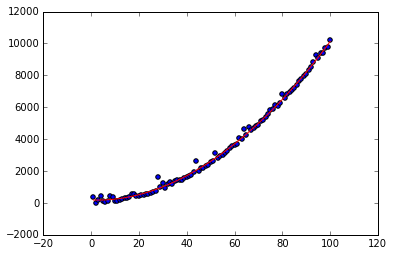

In [36]:
plt.scatter(x, y)
px = np.poly1d(z)
plt.plot(x, px(x), 'r-')

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x), np.log(y))
print slope, r_value**2

1.41829091878 0.850353401508


Groupby operations
---

In [33]:
import random, string
import matplotlib as mpl
def rands(n):
    choices = string.ascii_letters
    return ''.join([random.choice(choices) for _ in xrange(n)])
mpl.rc('figure', figsize=(12, 8))

ind_names = np.array(['ENERGY', 'FINANCIAL', 'TECH', 
                      'CONSDUR', 'SERVICES', 'UTILITIES'], dtype='O')
ccys = np.array(['USD', 'EUR'], dtype='O')

Nfull = 2000
tickers = np.array(sorted(rands(5).upper() for _ in xrange(Nfull)), dtype='O')
tickers = np.unique(tickers)

industries = pd.Series(ind_names.take(np.random.randint(0, 6, Nfull)), 
                       index=tickers, name='industry')
ccy = pd.Series(ccys.take(np.random.randint(0, len(ccys), Nfull)), 
                index=tickers, name='ccy')

In [34]:
ccy

ABDXV    EUR
ABFNK    USD
ABOOU    EUR
ACGCP    USD
ACRXL    EUR
ACUPQ    EUR
ADBXG    USD
ADVMM    USD
AEMQB    USD
AENOO    EUR
AEREW    USD
AETVB    EUR
AFWNP    EUR
AGTEL    USD
AGWAE    USD
AGXAF    USD
AHBRM    USD
AHFWY    USD
AHKCL    USD
AHKVW    EUR
AHLAC    EUR
AHQLH    USD
AHTTQ    USD
AHXWH    USD
AIZND    USD
AJGHT    USD
AJHZU    USD
AJMCJ    USD
AJNPG    USD
AJZVZ    USD
        ... 
ZNKAA    USD
ZOKYH    USD
ZONDS    EUR
ZPCMJ    USD
ZPMMD    EUR
ZQBFW    USD
ZQRNY    EUR
ZRYUC    EUR
ZSIFM    EUR
ZSJDM    EUR
ZSNVW    EUR
ZSXEH    EUR
ZTGFX    EUR
ZUBNS    EUR
ZUECK    EUR
ZUJLQ    USD
ZVFJN    USD
ZVZAP    USD
ZWCHM    USD
ZWEOH    EUR
ZWSJC    USD
ZWZZC    EUR
ZXFFE    USD
ZYDBR    USD
ZYHEL    EUR
ZYLKQ    USD
ZZAFC    USD
ZZFSW    EUR
ZZOBZ    EUR
ZZOTZ    EUR
Name: ccy, dtype: object

In [35]:
df = pd.DataFrame({'Momentum' : np.random.randn(1000) / 200 + 0.03,
                'Value' : np.random.randn(1000) / 200 + 0.08,
                'ShortInterest' : np.random.randn(1000) / 200 - 0.02},
                index=tickers.take(np.random.permutation(Nfull)[:1000]))
df.head()

       Momentum  ShortInterest     Value
LDQNU  0.031178      -0.012900  0.084594
KVNPE  0.038959      -0.015761  0.074342
NYRIL  0.035598      -0.021233  0.070780
EQRJJ  0.032065      -0.019855  0.081518
CBFHT  0.033508      -0.017301  0.088550

In [36]:
means = df.groupby(industries).mean()
means

           Momentum  ShortInterest     Value
industry                                    
CONSDUR    0.029533      -0.020063  0.080109
ENERGY     0.029796      -0.020050  0.080083
FINANCIAL  0.028928      -0.019391  0.079953
SERVICES   0.029318      -0.020368  0.080058
TECH       0.030470      -0.020055  0.079259
UTILITIES  0.029819      -0.020375  0.080093

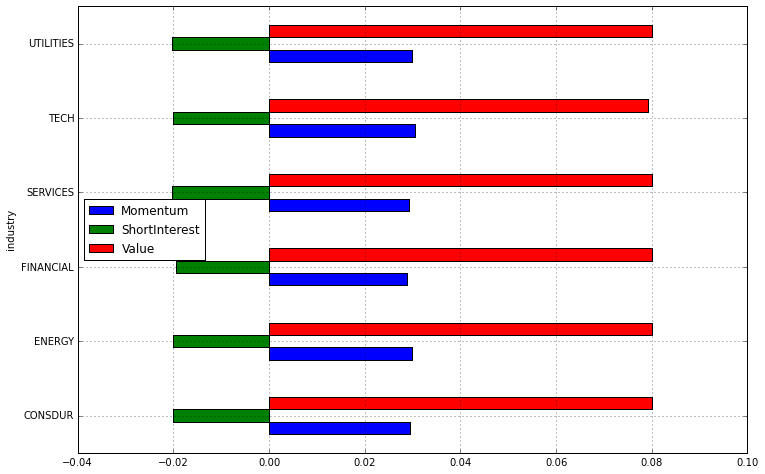

In [37]:
means.plot(kind='barh')

In [38]:
means = df.groupby([industries, ccy]).mean()
means

               Momentum  ShortInterest     Value
industry  ccy                                   
CONSDUR   EUR  0.029595      -0.020472  0.080495
          USD  0.029471      -0.019649  0.079718
ENERGY    EUR  0.030006      -0.020151  0.080513
          USD  0.029611      -0.019962  0.079705
FINANCIAL EUR  0.028627      -0.018909  0.079624
          USD  0.029222      -0.019862  0.080274
SERVICES  EUR  0.029504      -0.019712  0.080287
          USD  0.029121      -0.021063  0.079815
TECH      EUR  0.029732      -0.020271  0.079494
          USD  0.031217      -0.019837  0.079020
UTILITIES EUR  0.028841      -0.020151  0.079973
          USD  0.031032      -0.020653  0.080243

In [39]:
keys = [industries, ccy]
zscore = lambda x: (x - x.mean()) / x.std()
normed = df.groupby(keys).apply(zscore)

In [40]:
normed.groupby(keys).agg(['mean', 'std'])

                   Momentum     ShortInterest             Value    
                       mean std          mean std          mean std
industry  ccy                                                      
CONSDUR   EUR  1.098038e-15   1  3.994095e-16   1 -3.579792e-15   1
          USD  1.154084e-15   1 -5.688180e-16   1  5.242720e-15   1
ENERGY    EUR  1.940809e-15   1  8.520962e-16   1 -1.294277e-15   1
          USD -1.593353e-15   1 -2.879260e-16   1 -2.521792e-15   1
FINANCIAL EUR -9.482611e-16   1 -3.239239e-16   1  2.873518e-16   1
          USD -7.839754e-16   1  8.766934e-16   1 -9.992007e-16   1
SERVICES  EUR  9.736282e-16   1 -4.440892e-16   1 -3.731098e-15   1
          USD  1.535809e-15   1  2.616954e-16   1 -4.420075e-15   1
TECH      EUR -2.128168e-15   1 -1.211152e-16   1  5.378093e-16   1
          USD  2.950856e-16   1 -1.192394e-16   1  2.346077e-15   1
UTILITIES EUR  3.755658e-15   1 -5.467550e-16   1  7.723810e-15   1
          USD -4.983976e-16   1  4.440892e-16   

Hierarchical indexing
---

In [41]:
means

               Momentum  ShortInterest     Value
industry  ccy                                   
CONSDUR   EUR  0.029595      -0.020472  0.080495
          USD  0.029471      -0.019649  0.079718
ENERGY    EUR  0.030006      -0.020151  0.080513
          USD  0.029611      -0.019962  0.079705
FINANCIAL EUR  0.028627      -0.018909  0.079624
          USD  0.029222      -0.019862  0.080274
SERVICES  EUR  0.029504      -0.019712  0.080287
          USD  0.029121      -0.021063  0.079815
TECH      EUR  0.029732      -0.020271  0.079494
          USD  0.031217      -0.019837  0.079020
UTILITIES EUR  0.028841      -0.020151  0.079973
          USD  0.031032      -0.020653  0.080243

In [42]:
means['Momentum']

industry   ccy
CONSDUR    EUR    0.029595
           USD    0.029471
ENERGY     EUR    0.030006
           USD    0.029611
FINANCIAL  EUR    0.028627
           USD    0.029222
SERVICES   EUR    0.029504
           USD    0.029121
TECH       EUR    0.029732
           USD    0.031217
UTILITIES  EUR    0.028841
           USD    0.031032
Name: Momentum, dtype: float64

In [43]:
means.ix['TECH']

     Momentum  ShortInterest     Value
ccy                                   
EUR  0.029732      -0.020271  0.079494
USD  0.031217      -0.019837  0.079020

In [44]:
means.stack()

industry   ccy               
CONSDUR    EUR  Momentum         0.029595
                ShortInterest   -0.020472
                Value            0.080495
           USD  Momentum         0.029471
                ShortInterest   -0.019649
                Value            0.079718
ENERGY     EUR  Momentum         0.030006
                ShortInterest   -0.020151
                Value            0.080513
           USD  Momentum         0.029611
                ShortInterest   -0.019962
                Value            0.079705
FINANCIAL  EUR  Momentum         0.028627
                ShortInterest   -0.018909
                Value            0.079624
           USD  Momentum         0.029222
                ShortInterest   -0.019862
                Value            0.080274
SERVICES   EUR  Momentum         0.029504
                ShortInterest   -0.019712
                Value            0.080287
           USD  Momentum         0.029121
                ShortInterest   -0.021063
    

In [45]:
means.stack().unstack('industry')

industry            CONSDUR    ENERGY  FINANCIAL  SERVICES      TECH  \
ccy                                                                    
EUR Momentum       0.029595  0.030006   0.028627  0.029504  0.029732   
    ShortInterest -0.020472 -0.020151  -0.018909 -0.019712 -0.020271   
    Value          0.080495  0.080513   0.079624  0.080287  0.079494   
USD Momentum       0.029471  0.029611   0.029222  0.029121  0.031217   
    ShortInterest -0.019649 -0.019962  -0.019862 -0.021063 -0.019837   
    Value          0.079718  0.079705   0.080274  0.079815  0.079020   

industry           UTILITIES  
ccy                           
EUR Momentum        0.028841  
    ShortInterest  -0.020151  
    Value           0.079973  
USD Momentum        0.031032  
    ShortInterest  -0.020653  
    Value           0.080243  

Merging and joining
---

In [46]:
base = '/Users/wesm/Dropbox/book/svn/book_scripts/movielens/ml-1m'
get_path = lambda x: '%s/%s.dat' % (base, x)

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(get_path('users'), sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(get_path('ratings'), sep='::', header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(get_path('movies'), sep='::', header=None, names=mnames)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/io/parsers.py:644: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


IOError: [Errno 2] No such file or directory: '/Users/wesm/Dropbox/book/svn/book_scripts/movielens/ml-1m/users.dat'

In [ ]:
movies.head()

In [ ]:
ratings.head()

In [ ]:
users.head()

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

In [ ]:
rating_counts = data.groupby('title').size()
freq_titles = rating_counts.index[rating_counts > 1000]
freq_titles

In [ ]:
highest_rated = data.groupby('title').rating.mean()[freq_titles].order()[-20:]
highest_rated

In [ ]:
filtered = data[data.title.isin(highest_rated.index)]
filtered.title = filtered.title.str[:25]
filtered.groupby(['title', 'gender']).rating.count().unstack()

Pivot tables
---

In [ ]:
mean_ratings = data.pivot_table('rating', rows='title',
                                cols='gender', aggfunc='mean')
mean_ratings.tail(20)

Data summary, statistics
---
summary, value_counts, etc.

In [ ]:
data.title.value_counts()

In [ ]:
data.rating.describe()

In [ ]:
by_gender = data.groupby('gender').rating.describe()
by_gender

In [ ]:
by_gender.unstack(0)